# Relation Viewer Prototype
Purpose: Explore options for viewing relations

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.relation import Relation

In [4]:
#setup test data 1
#basic split data set 
image_fps=['img_a','img_b','img_c','img_d','img_e','img_f']
rel1=[
    Relation('img_a','img_b'),
    Relation('img_b','img_c'),
    Relation('img_c','img_d'),
    Relation('img_a','img_e'),
    Relation('img_e','img_f')
]
display([x.ref for x in rel1])

[('img_a', 'img_b'),
 ('img_b', 'img_c'),
 ('img_c', 'img_d'),
 ('img_a', 'img_e'),
 ('img_e', 'img_f')]

In [9]:
%pip install networkx[default]

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ------- -------------------------------- 0.4/2.1 MB 11.6 MB/s eta 0:00:01
     -------------- ------------------------- 0.8/2.1 MB 9.7 MB/s eta 0:00:01
     ------------------------- -------------- 1.3/2.1 MB 10.5 MB/s eta 0:00:01
     -------------------------------------- - 2.0/2.1 MB 11.4 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 11.0 MB/s eta 0:00:00
  Obtaining dependency information for scipy>=1.8 from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB ? eta 0:00:00
  Obtaining dependency information for matplotlib>=3.4 from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.

In [3]:
import networkx as nx
G = nx.Graph()

In [5]:
G.add_nodes_from(image_fps)

In [6]:
H=nx.Graph()
H.add_edges_from([x.ref for x in rel1])

In [7]:
display(G.nodes)
display(G.edges)
display(G.adj)
display(G.degree)

NodeView(('img_a', 'img_b', 'img_c', 'img_d', 'img_e', 'img_f'))

EdgeView([])

AdjacencyView({'img_a': {}, 'img_b': {}, 'img_c': {}, 'img_d': {}, 'img_e': {}, 'img_f': {}})

DegreeView({'img_a': 0, 'img_b': 0, 'img_c': 0, 'img_d': 0, 'img_e': 0, 'img_f': 0})

In [8]:
display(H.nodes)
display(H.edges)
display(H.adj)
display(H.degree)

NodeView(('img_a', 'img_b', 'img_c', 'img_d', 'img_e', 'img_f'))

EdgeView([('img_a', 'img_b'), ('img_a', 'img_e'), ('img_b', 'img_c'), ('img_c', 'img_d'), ('img_e', 'img_f')])

AdjacencyView({'img_a': {'img_b': {}, 'img_e': {}}, 'img_b': {'img_a': {}, 'img_c': {}}, 'img_c': {'img_b': {}, 'img_d': {}}, 'img_d': {'img_c': {}}, 'img_e': {'img_a': {}, 'img_f': {}}, 'img_f': {'img_e': {}}})

DegreeView({'img_a': 2, 'img_b': 2, 'img_c': 2, 'img_d': 1, 'img_e': 2, 'img_f': 1})

In [9]:
L=nx.Graph([x.ref for x in rel1])
display(L.nodes)
display(L.edges)
display(L.adj)
display(L.degree)

NodeView(('img_a', 'img_b', 'img_c', 'img_d', 'img_e', 'img_f'))

EdgeView([('img_a', 'img_b'), ('img_a', 'img_e'), ('img_b', 'img_c'), ('img_c', 'img_d'), ('img_e', 'img_f')])

AdjacencyView({'img_a': {'img_b': {}, 'img_e': {}}, 'img_b': {'img_a': {}, 'img_c': {}}, 'img_c': {'img_b': {}, 'img_d': {}}, 'img_d': {'img_c': {}}, 'img_e': {'img_a': {}, 'img_f': {}}, 'img_f': {'img_e': {}}})

DegreeView({'img_a': 2, 'img_b': 2, 'img_c': 2, 'img_d': 1, 'img_e': 2, 'img_f': 1})

In [10]:
G.add_edge(rel1[0].ref[0],rel1[0].ref[1],object=rel1[0])
#give object to edge!

In [34]:
H.add_edge("img_c","img_g")
H.add_edge("img_g","img_h")
H.add_node("img_a",color='red')

In [43]:
h_color=['b']*len(H.nodes)
h_color[0]='g'

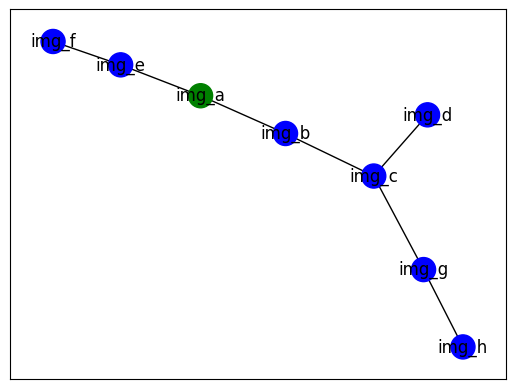

In [44]:

nx.draw_networkx(H,node_color=h_color)


In [ ]:
#https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html#sphx-glr-auto-examples-drawing-plot-custom-node-icons-py
#could use picture as node.